# 時系列データをPythonで取り扱う

In [1]:
# 必要なライブラリのimport
import pandas as pd
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# CSVファイルのデータを読み込む
csv_data = pd.read_csv('./time-series.csv')

# 先頭5件を表示
csv_data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
# データの形式を確認
csv_data.dtypes

Month          object
#Passengers     int64
dtype: object

In [4]:
# #Passengers列のみでSeries型のデータを作る
data = csv_data["#Passengers"]

# Month列をPeriodIndex型に変換してdataのインデックスに設定する
data.index = pd.PeriodIndex(csv_data["Month"], freq="M")

# dataの先頭5行を表示
data.head()

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
Freq: M, Name: #Passengers, dtype: int64

In [5]:
# 1949年1月から1949年5月までのデータを年月の指定で抽出
data['1949-01':'1949-05']

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
Freq: M, Name: #Passengers, dtype: int64

In [6]:
# 1949年のデータを抽出
data['1949']

Month
1949-01    112
1949-02    118
1949-03    132
1949-04    129
1949-05    121
1949-06    135
1949-07    148
1949-08    148
1949-09    136
1949-10    119
1949-11    104
1949-12    118
Freq: M, Name: #Passengers, dtype: int64

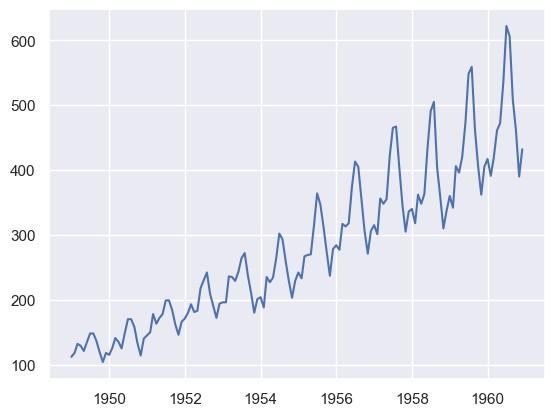

In [7]:
# データの概要をグラフで確認
plt.plot(data.index.to_timestamp(), data.values)

## 自己回帰（AR）モデル

In [8]:
# ARモデル（1）を作成
model = ARIMA(data, order=(1, 0, 0), freq=data.index.freq)
model_fit = model.fit()

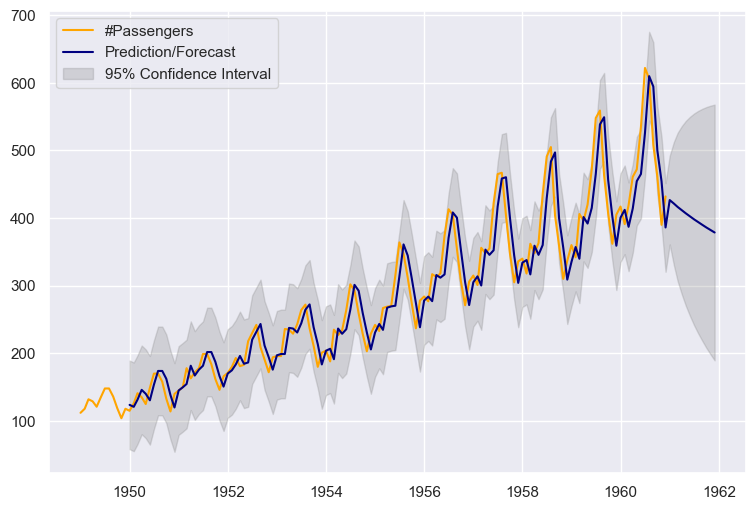

In [9]:
# ARモデル（1）による回帰と予測の結果を描画
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(data.index.to_timestamp(), data.values, label="#Passengers", color="orange")

# 予測期間の指定 (PeriodIndexに合わせる)
predict_start_period = pd.Period('1950-01', freq='M')
predict_end_period = pd.Period('1961-12', freq='M')

# 予測の実行
predictions = model_fit.get_prediction(start=predict_start_period, end=predict_end_period)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# 予測値をプロット
ax.plot(predicted_mean.index.to_timestamp(), predicted_mean, label='Prediction/Forecast', color='navy')

# 信頼区間をプロット
ax.fill_between(confidence_intervals.index.to_timestamp(),
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='gray', alpha=0.25, label='95% Confidence Interval')
ax.legend()

In [10]:
# ARモデル（1）の概要を確認
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -711.090
Date:                Fri, 23 May 2025   AIC                           1428.181
Time:                        09:24:54   BIC                           1437.090
Sample:                    01-31-1949   HQIC                          1431.801
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.2943     66.403      4.221      0.000     150.146     410.442
ar.L1          0.9645      0.019     51.535      0.000       0.928       1.001
sigma2      1118.5409    122.133      9.158      0.0

In [11]:
# ARモデル（1）のAICを確認
model_fit.aic

np.float64(1428.1805312555102)

## 移動平均（MA）モデル

In [ ]:
# MAモデル（1）を作成
model = ARIMA(data, order=(0, 0, 1), freq=data.index.freq)
model_fit = model.fit()

Text(0.5, 1.0, 'MA Model (1) Fit and Forecast')

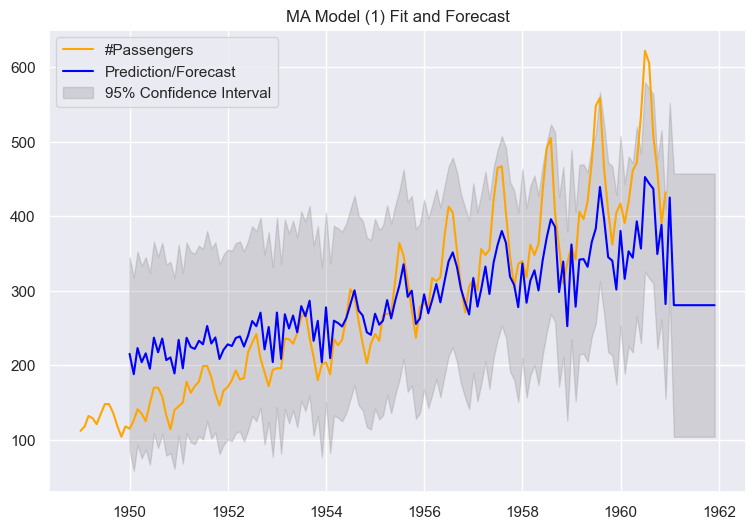

In [13]:
# MAモデル（1）による回帰と予測の結果を描画
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(data.index.to_timestamp(), data.values, label="#Passengers", color="orange")

# 予測期間の指定
predict_start_period = pd.Period('1950-01', freq=data.index.freq)
predict_end_period = pd.Period('1961-12', freq=data.index.freq)

# 予測の実行
predictions = model_fit.get_prediction(start=predict_start_period, end=predict_end_period)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# 予測値をプロット
ax.plot(predicted_mean.index.to_timestamp(), predicted_mean, label='Prediction/Forecast', color='blue')
# 信頼区間をプロット
ax.fill_between(confidence_intervals.index.to_timestamp(),
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='gray', alpha=0.25, label='95% Confidence Interval')
ax.legend()
plt.title("MA Model (1) Fit and Forecast")

In [14]:
# MAモデル（1）の概要を確認
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -806.431
Date:                Fri, 23 May 2025   AIC                           1618.863
Time:                        09:24:54   BIC                           1627.772
Sample:                    01-31-1949   HQIC                          1622.483
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.6521     11.648     24.094      0.000     257.822     303.482
ma.L1          0.9642      0.030     32.205      0.000       0.906       1.023
sigma2      4205.0752    586.678      7.168      0.0

In [15]:
# MAモデル（1）のAICを確認
model_fit.aic

np.float64(1618.86252811155)

## 自己回帰移動平均（ARMA）モデル

In [16]:
# ARMAモデル（1,1）を作成
model = ARIMA(data, order=(1, 0, 1), freq=data.index.freq)
model_fit = model.fit()

Text(0.5, 1.0, 'ARMA Model (1,1) Fit and Forecast')

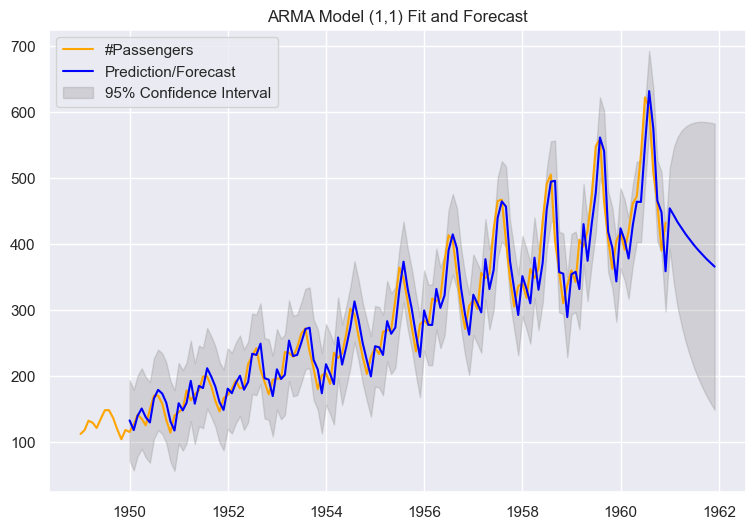

In [17]:
# ARMAモデル（1,1）による回帰と予測の結果を描画
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(data.index.to_timestamp(), data.values, label="#Passengers", color="orange")

# 予測期間の指定
predict_start_period = pd.Period('1950-01', freq=data.index.freq)
predict_end_period = pd.Period('1961-12', freq=data.index.freq)

# 予測の実行
predictions = model_fit.get_prediction(start=predict_start_period, end=predict_end_period)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# 予測値をプロット
ax.plot(predicted_mean.index.to_timestamp(), predicted_mean, label='Prediction/Forecast', color='blue')
# 信頼区間をプロット
ax.fill_between(confidence_intervals.index.to_timestamp(),
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='gray', alpha=0.25, label='95% Confidence Interval')
ax.legend()
plt.title("ARMA Model (1,1) Fit and Forecast")

In [18]:
# ARMAモデル（1,1）の概要を確認
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -700.874
Date:                Fri, 23 May 2025   AIC                           1409.749
Time:                        09:24:54   BIC                           1421.628
Sample:                    01-31-1949   HQIC                          1414.576
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        280.3009     56.644      4.948      0.000     169.281     391.321
ar.L1          0.9373      0.028     34.009      0.000       0.883       0.991
ma.L1          0.4264      0.076      5.642      0.0

In [19]:
# ARMAモデル（1,1）のAICを確認
model_fit.aic

np.float64(1409.7487227835622)

## 自己回帰和分移動平均（ARIMA）モデル

In [20]:
# ARIMAモデル（1,1,1）を作成
model = ARIMA(data, order=(1, 1, 1), freq=data.index.freq)
model_fit = model.fit()

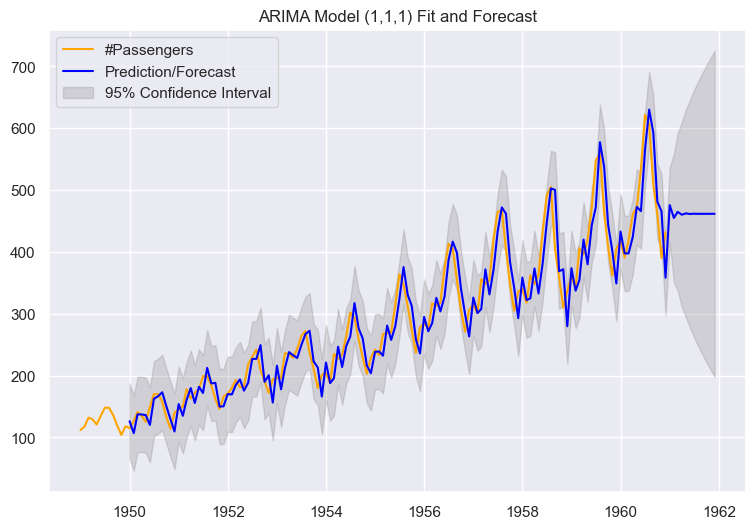

In [21]:
# ARIMAモデル（1,1,1）による回帰と予測の結果を描画
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(data.index.to_timestamp(), data.values, label="#Passengers", color="orange")

# 予測期間の指定
predict_start_period = pd.Period('1950-01', freq=data.index.freq)
predict_end_period = pd.Period('1961-12', freq=data.index.freq)

# 予測の実行
predictions = model_fit.get_prediction(start=predict_start_period, end=predict_end_period)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# 予測値をプロット
ax.plot(predicted_mean.index.to_timestamp(), predicted_mean, label='Prediction/Forecast', color='blue')
# 信頼区間をプロット
ax.fill_between(confidence_intervals.index.to_timestamp(),
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='gray', alpha=0.25, label='95% Confidence Interval')
ax.legend()
plt.title("ARIMA Model (1,1,1) Fit and Forecast")
plt.show()

In [22]:
# ARIMAモデル（1,1,1）の概要を確認
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Fri, 23 May 2025   AIC                           1394.683
Time:                        09:24:54   BIC                           1403.571
Sample:                    01-31-1949   HQIC                          1398.294
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

In [23]:
# ARIMAモデル（1,1,1）のAICを確認
model_fit.aic

np.float64(1394.6825053251882)

## 最適なパラメータの選択

In [24]:
# pmdarima互換の実装my_pmdarimaのimport
from my_pmdarima import auto_arima

# 最適なARIMAのパラメータをauto_arimaで調べる
arima_model_fit = auto_arima(data, seasonal=False, trace=True)

START  (2, 1, 2)                AIC= 1328.142
  (1, 1, 1)                AIC= 1377.293 Δ= 49.151  ( 0.02s)
  (1, 1, 2)                AIC= 1359.435 Δ= 31.293  ( 0.03s)
  (1, 1, 3)                AIC= 1352.150 Δ= 24.008  ( 0.04s)
  (2, 1, 1)                AIC= 1361.386 Δ= 33.244  ( 0.03s)
  (2, 1, 3)                AIC= 1351.466 Δ= 23.324  ( 0.07s)
  (3, 1, 1)                AIC= 1353.659 Δ= 25.517  ( 0.04s)
  (3, 1, 2)                AIC= 1352.004 Δ= 23.863  ( 0.05s)
  (3, 1, 3)                AIC= 1337.231 Δ= 9.090  ( 0.07s)
  (3, 1, 4)                AIC= 1304.454 Δ=-23.687  ( 0.16s)
  (2, 1, 4)                AIC= 1319.221 Δ= 14.766  ( 0.08s)
  (2, 1, 5)                AIC= 1294.259 Δ=-10.196  ( 0.18s)
  (1, 1, 4)                AIC= 1330.115 Δ= 35.856  ( 0.07s)
  (1, 1, 5)                AIC= 1303.196 Δ= 8.937  ( 0.16s)
  (3, 1, 5)                AIC= 1312.407 Δ= 18.148  ( 0.16s)

==> BEST  ARIMA(2, 1, 5)   AIC= 1294.259


Text(0.5, 1.0, 'Optimized ARIMA Fit and Forecast')

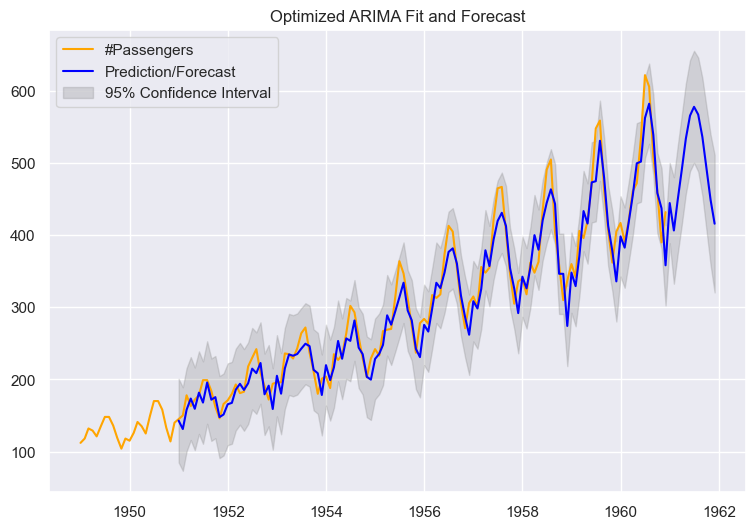

In [25]:
# 最適化ARIMAモデルによる回帰と予測の結果を描画
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(data.index.to_timestamp(), data.values, label="#Passengers", color="orange")

# 予測期間の指定
predict_start_period = pd.Period('1951-01', freq=data.index.freq)
predict_end_period = pd.Period('1961-12', freq=data.index.freq)

# 予測の実行
predictions = arima_model_fit.get_prediction(start=predict_start_period, end=predict_end_period)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# 予測値をプロット
ax.plot(predicted_mean.index.to_timestamp(), predicted_mean, label='Prediction/Forecast', color='blue')
# 信頼区間をプロット
ax.fill_between(confidence_intervals.index.to_timestamp(),
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='gray', alpha=0.25, label='95% Confidence Interval')
ax.legend()
plt.title(f"Optimized ARIMA Fit and Forecast")

In [26]:
# 最適化ARIMAモデルの概要を確認
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(2, 1, 5)   Log Likelihood                -639.129
Date:                Fri, 23 May 2025   AIC                           1294.259
Time:                        09:24:56   BIC                           1317.619
Sample:                    01-31-1949   HQIC                          1303.752
                         - 12-31-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7406      0.022     78.078      0.000       1.697       1.784
ar.L2         -1.0061      0.022    -46.580      0.000      -1.048      -0.964
ma.L1         -1.8699      0.158    -11.799      0.0

## 季節変動自己回帰和分移動平均（SARIMA）モデル

In [27]:
# 最適なSARIMAのパラメータをauto_arimaで調べる
arima_model_seasonal = auto_arima(data, seasonal=True, trace=True, trend='c', m=12)

START  (2, 1, 2)(1, 0, 1, 12)   AIC= 983.523
  (1, 1, 1)(1, 0, 1, 12)   AIC= 994.093 Δ= 10.569  ( 0.26s)
  (1, 1, 2)(1, 0, 1, 12)   AIC= 982.253 Δ=-1.270  ( 0.38s)
  (0, 1, 1)(1, 0, 1, 12)   AIC= 987.045 Δ= 4.793  ( 0.11s)
  (0, 1, 2)(1, 0, 1, 12)   AIC= 982.370 Δ= 0.117  ( 0.13s)
  (0, 1, 3)(1, 0, 1, 12)   AIC= 977.006 Δ=-5.247  ( 0.20s)
  (0, 1, 3)(0, 0, 1, 12)   AIC= 1149.086 Δ= 172.079  ( 0.25s)
  (0, 1, 3)(1, 0, 0, 12)   AIC= 1017.154 Δ= 40.148  ( 0.10s)
  (0, 1, 3)(1, 0, 2, 12)   AIC= 894.330 Δ=-82.676  ( 0.55s)
  (0, 1, 2)(1, 0, 2, 12)   AIC= 901.717 Δ= 7.387  ( 0.42s)
  (0, 1, 3)(0, 0, 2, 12)   AIC= 1005.884 Δ= 111.554  ( 0.62s)
  (0, 1, 3)(2, 0, 2, 12)   AIC= 891.286 Δ=-3.044  ( 0.71s)
  (0, 1, 2)(2, 0, 2, 12)   AIC= 898.086 Δ= 6.800  ( 0.64s)
  (0, 1, 3)(2, 0, 1, 12)   AIC= 924.319 Δ= 33.033  ( 0.60s)
  (0, 1, 4)(2, 0, 2, 12)   AIC= 892.354 Δ= 1.068  ( 1.10s)
  (1, 1, 2)(2, 0, 2, 12)   AIC= 898.254 Δ= 6.968  ( 0.71s)
  (1, 1, 3)(2, 0, 2, 12)   AIC= 891.874 Δ= 0.588  ( 0.86s)


Text(0.5, 1.0, 'Optimized SARIMA Fit and Forecast')

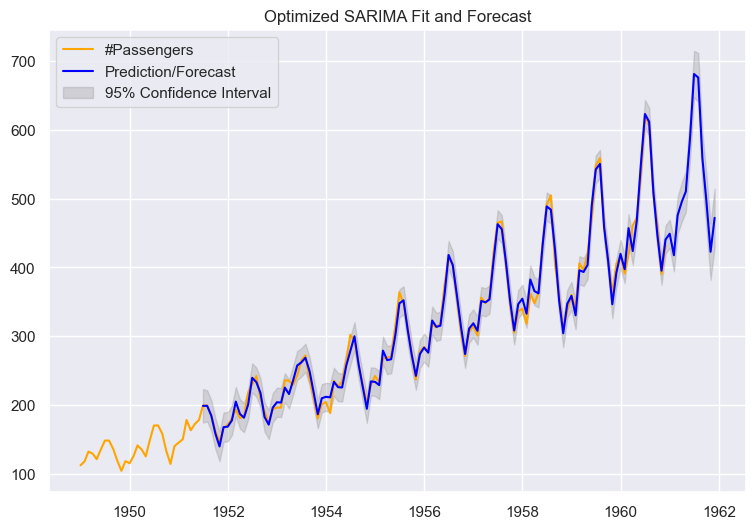

In [28]:
# 最適化SARIMAモデルによる回帰と予測の結果を描画
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(data.index.to_timestamp(), data.values, label="#Passengers", color="orange")

# 予測期間の指定
predict_start_period = pd.Period('1951-07', freq=data.index.freq)
predict_end_period = pd.Period('1961-12', freq=data.index.freq)

# 予測の実行
# arima_model_seasonal は auto_arima (seasonal=True) の結果
predictions = arima_model_seasonal.get_prediction(start=predict_start_period, end=predict_end_period)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()

# 予測値をプロット
ax.plot(predicted_mean.index.to_timestamp(), predicted_mean, label='Prediction/Forecast', color='blue')
# 信頼区間をプロット
ax.fill_between(confidence_intervals.index.to_timestamp(),
                confidence_intervals.iloc[:, 0],
                confidence_intervals.iloc[:, 1], color='gray', alpha=0.25, label='95% Confidence Interval')
ax.legend()
plt.title(f"Optimized SARIMA Fit and Forecast")

In [29]:
# 最適化SARIMAXモデルの概要を確認
print(arima_model_seasonal.summary())

                                        SARIMAX Results                                        
Dep. Variable:                             #Passengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 5)x(2, 0, [1, 2], 12)   Log Likelihood                -425.607
Date:                                 Fri, 23 May 2025   AIC                            873.215
Time:                                         09:25:13   BIC                            903.216
Sample:                                     01-31-1949   HQIC                           885.389
                                          - 12-31-1960                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2296      0.541     -0.425      0.671      -1.289       0